In [1]:
import itertools
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline


#### Data-set was obtained from Kaggle (https://www.kaggle.com/zhijinzhai/loandata/data)

Some information about the data columns:

Loan_id A unique loan number assigned to each loan customers

Loan_status Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts

Principal Basic principal loan amount at the origination

terms Can be weekly (7 days), biweekly, and monthly payoff schedule

Effective_date When the loan got originated and took effects

Due_date Since it’s one-time payoff schedule, each loan has one single due date

Paidoff_time The actual time a customer pays off the loan

Pastdue_days How many days a loan has been past due

Age, education, gender A customer’s basic demographic information


In [2]:
data_frame = pd.read_csv("Loan_payments_data.csv")

In [3]:
# print ("Shape of dataset before cleaning: ", data_frame.size)

# data_frame = data_frame.dropna()
# data_frame = data_frame.reset_index(drop=True)
# print ("Shape of dataset after cleaning: ", data_frame.size)
# data_frame.head(5)

# Shape of dataset before cleaning:  5500
# Shape of dataset after cleaning:  1100

In [4]:
data_frame.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [5]:
data_frame.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [6]:
data1 = data_frame.copy()

In [7]:
data_frame['Principal'].unique()

array([1000,  300,  800,  900,  700,  500])

In [8]:
data_frame['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

#### There are 3 types of loan status, Now let me explain the following:

'PAIDOFF' =>  means those people gave their money before or on due date without the help of any external agencies


'COLLECTION' =>  Risky people, they havenot given the money and the lenders will have to acquire the money with the help of 
some 3rd party organisations


'COLLECTION_PAIDOFF' => These people have given the money after the 3rd party organisations have forced them to do so.

In [9]:
#  For converting it to One hot encoded values

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
#data_frame['loan_status']=le.fit_transform(data_frame['loan_status'])
data_frame['Gender']=le.fit_transform(data_frame['Gender'])
data_frame['education']=le.fit_transform(data_frame['education'])
data_frame['past_due_days']=le.fit_transform(data_frame['past_due_days'])

In [10]:
df =data1[data_frame['past_due_days'] ==60 ]
df.head(5)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
299,xqd20160300,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 11:00,NaN,28,college,male


In [11]:
# convert 'PAIDOFF' to 1 and other two categories to 0
data_frame['loan_status'] = data_frame['loan_status'].map({'PAIDOFF': 1, 'COLLECTION': 0, 'COLLECTION_PAIDOFF': 0})

In [12]:
data_frame['Principal'].value_counts()

1000    377
800     111
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64

In [13]:
data_frame.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,1,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,83,45,1,1
1,xqd20168902,1,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,173,50,0,0
2,xqd20160003,1,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,172,33,0,0
3,xqd20160004,1,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,171,27,3,1
4,xqd20160005,1,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,170,28,3,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb5e91e430>]],
      dtype=object)

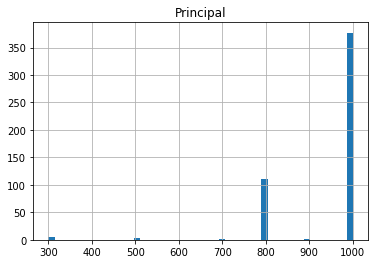

In [14]:
data_frame.hist(column='Principal', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb5e16e0a0>]],
      dtype=object)

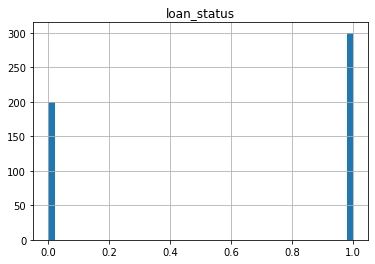

In [15]:
data_frame.hist(column='loan_status', bins=50)
# Note 0 = 'PAIDOFF', 1 = 'COLLECTION', and 2 = 'COLLECTION_PAIDOFF'

In [16]:
# Creating a new column for storing the difference between due date and paid off time
# data_frame['diff_effective_due'] = data_frame['due_date'].sub(data_frame['effective_date'], axis=0)


In [17]:
data_frame.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

In [18]:
# Now we create the features X

In [19]:
X = data_frame[[ 'Principal','terms', 'past_due_days', 'Gender', 'age', 'education']] .values  #.astype(float)
X[0:5]

array([[1000,   30,   83,    1,   45,    1],
       [1000,   30,  173,    0,   50,    0],
       [1000,   30,  172,    0,   33,    0],
       [1000,   15,  171,    1,   27,    3],
       [1000,   30,  170,    0,   28,    3]])

In [20]:
y = data_frame['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [21]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.49337687,  0.89789115, -0.3121607 ,  0.42665337,  2.28404253,
        -0.65294626],
       [ 0.49337687,  0.89789115,  0.53872255, -2.34382305,  3.10658738,
        -1.51892274],
       [ 0.49337687,  0.89789115,  0.52926829, -2.34382305,  0.3099349 ,
        -1.51892274],
       [ 0.49337687, -0.97897162,  0.51981403,  0.42665337, -0.67711892,
         1.07900669],
       [ 0.49337687,  0.89789115,  0.51035977, -2.34382305, -0.51260995,
         1.07900669]])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 6) (400,)
Test set: (100, 6) (100,)


In [23]:
from sklearn import metrics
# print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
# print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

In [24]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.93, 0.9 , 0.92, 0.88, 0.9 , 0.88, 0.91, 0.93, 0.93, 0.92, 0.92,
       0.93, 0.93, 0.9 , 0.91, 0.9 , 0.9 , 0.91, 0.9 , 0.91, 0.9 , 0.9 ,
       0.88, 0.9 , 0.88, 0.89, 0.87, 0.87, 0.88])

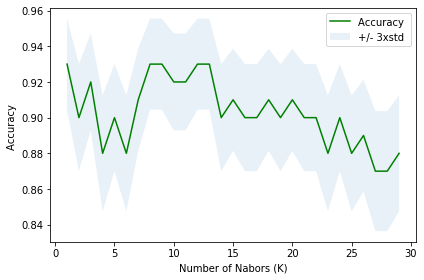

In [25]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [26]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.93 with k= 1


#### So, by using the features of the given dataset, we find K = 1, 8 and 9, wierd isn't it? But this dataset have a pattern like this.

In [27]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:656: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  warnings.warn('jaccard_similarity_score has been deprecated and replaced '


0.88

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[57  9]
 [ 3 31]]


Confusion matrix, without normalization
[[57  9]
 [ 3 31]]


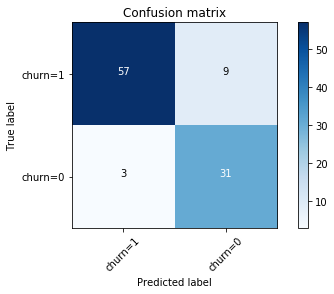

In [30]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [31]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        34
           1       0.95      0.86      0.90        66

    accuracy                           0.88       100
   macro avg       0.86      0.89      0.87       100
weighted avg       0.89      0.88      0.88       100



# Decision Tree Method

In [39]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [41]:
data_frame = pd.read_csv("Loan_payments_data.csv")

In [46]:
#  For converting it to One hot encoded values

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
# let us keep the default 3 classes of the dataframe...
data_frame['loan_status']=le.fit_transform(data_frame['loan_status'])
data_frame['Gender']=le.fit_transform(data_frame['Gender'])
data_frame['education']=le.fit_transform(data_frame['education'])
data_frame['past_due_days']=le.fit_transform(data_frame['past_due_days'])

In [47]:
data_frame.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,2,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,83,45,1,1
1,xqd20168902,2,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,173,50,0,0
2,xqd20160003,2,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,172,33,0,0
3,xqd20160004,2,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,171,27,3,1
4,xqd20160005,2,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,170,28,3,0


In [48]:
X = data_frame[['Principal', 'terms', 'past_due_days', 'age', 'education', 'Gender']].values
X[0:5]

array([[1000,   30,   83,   45,    1,    1],
       [1000,   30,  173,   50,    0,    0],
       [1000,   30,  172,   33,    0,    0],
       [1000,   15,  171,   27,    3,    1],
       [1000,   30,  170,   28,    3,    0]])

In [49]:
y = data_frame["loan_status"]
y[0:5]

0    2
1    2
2    2
3    2
4    2
Name: loan_status, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [51]:
print(X_trainset.shape)
print(y_trainset.shape)


(350, 6)
(350,)


In [52]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
loanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
predTree = loanTree.predict(X_testset)

In [56]:
print (predTree [0:5])
print (y_testset [0:5])


[2 2 2 2 2]
130    2
291    2
37     2
239    2
191    2
Name: loan_status, dtype: int64


#### Printing the accuracy of the decision tree

In [57]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9666666666666667


In [60]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [66]:
pd.DataFrame.from_records(X)

,0,1,2,3,4,5
0,1000,30,83,45,1,1
1,1000,30,173,50,0,0
2,1000,30,172,33,0,0
3,1000,15,171,27,3,1
4,1000,30,170,28,3,0
...,...,...,...,...,...,...
495,1000,30,2,28,1,1
496,1000,15,11,26,1,1
497,800,15,2,30,3,1
498,1000,30,0,38,3,0


In [68]:
dot_data = StringIO()
filename = "loanTree.png"
featureNames = pd.DataFrame.from_records(X)
targetNames = data_frame["loan_status"].unique().tolist()
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

ValueError: Length of feature_names, 500 does not match number of features, 6

In [32]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/usr/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [33]:
data_frame.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,1,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,83,45,1,1
1,xqd20168902,1,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,173,50,0,0
2,xqd20160003,1,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,172,33,0,0
3,xqd20160004,1,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,171,27,3,1
4,xqd20160005,1,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,170,28,3,0


In [34]:
featureset = data_frame[[ 'Principal','terms', 'past_due_days', 'Gender', 'age', 'education', 'education']]

from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[1.  , 1.  , 0.25, 1.  , 0.82, 0.33, 0.33],
       [1.  , 1.  , 0.52, 0.  , 0.97, 0.  , 0.  ],
       [1.  , 1.  , 0.52, 0.  , 0.45, 0.  , 0.  ],
       [1.  , 0.35, 0.52, 1.  , 0.27, 1.  , 1.  ],
       [1.  , 1.  , 0.51, 0.  , 0.3 , 1.  , 1.  ]])

In [35]:
import scipy
leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [36]:
import pylab
import scipy.cluster.hierarchy
Z = scipy.cluster.hierarchy.linkage(D, 'complete')

<ipython-input-36-e89f68dff182>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = scipy.cluster.hierarchy.linkage(D, 'complete')


In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

#### Decision Tree according to Principal, Age and education

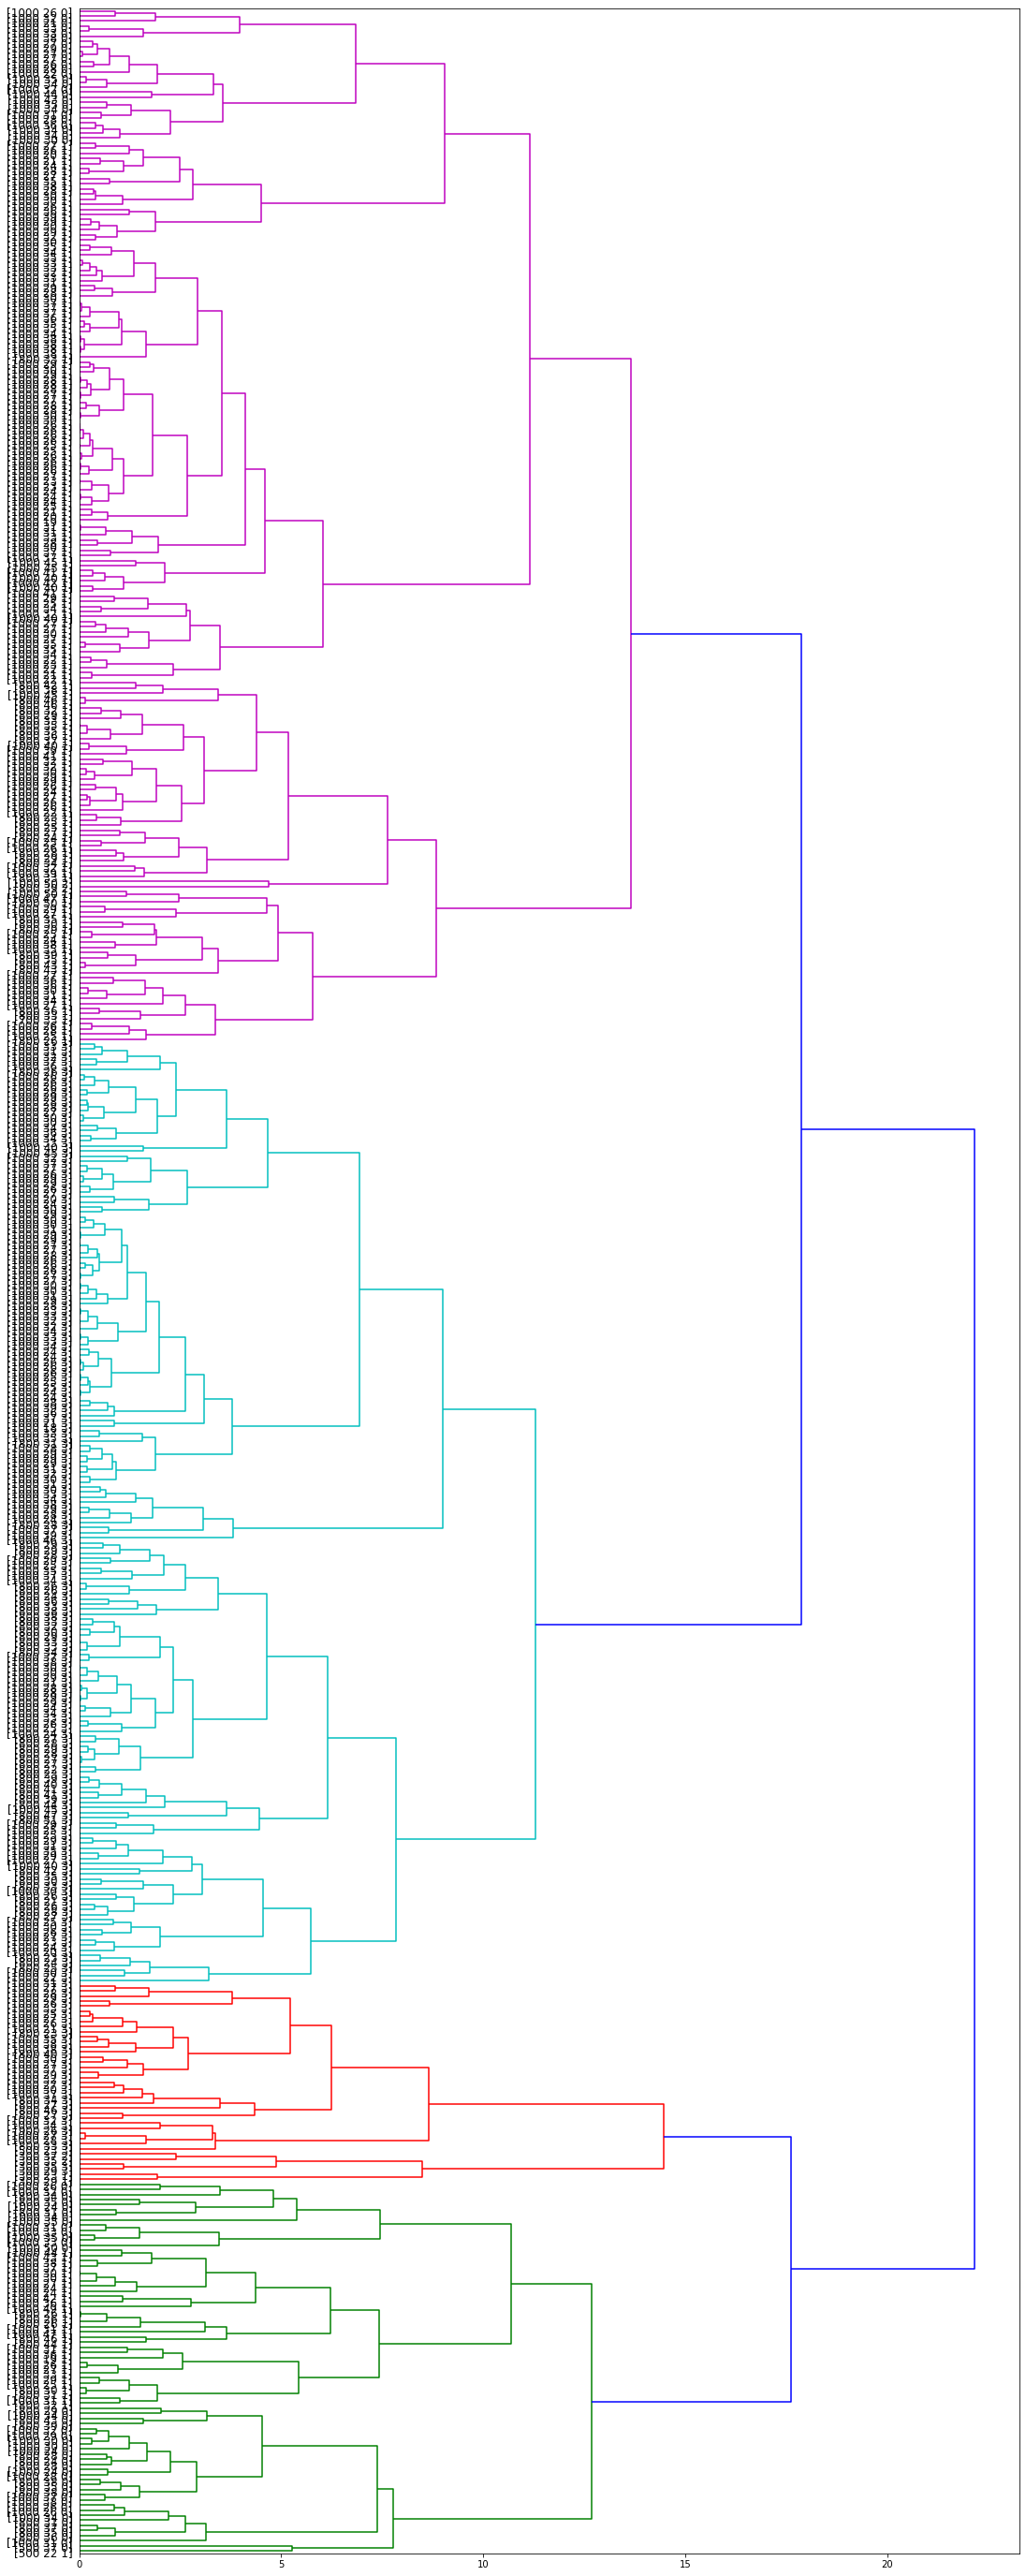

In [38]:
# loan_status 	Principal 	terms 	effective_date 	due_date 	paid_off_time 	past_due_days 	age 	education 	Gender

fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (data_frame['Principal'][id], data_frame['age'][id], int(float(data_frame['education'][id])) )
    
dendro = scipy.cluster.hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')